## <span style="color:blue">  Numerical exercises 6</span>

In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

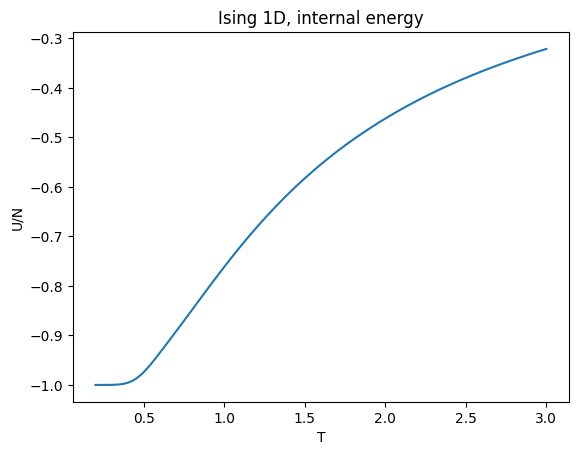

In [1]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}

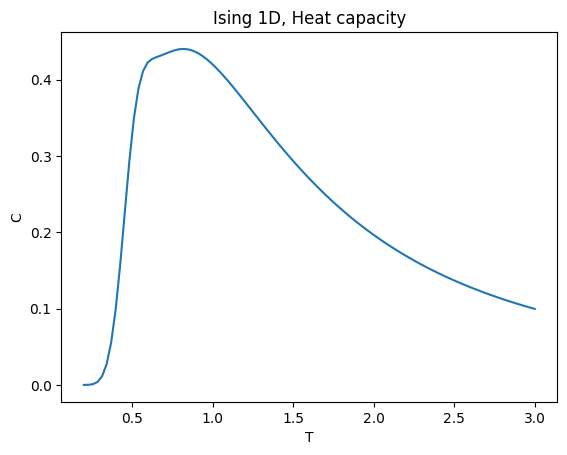

In [2]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

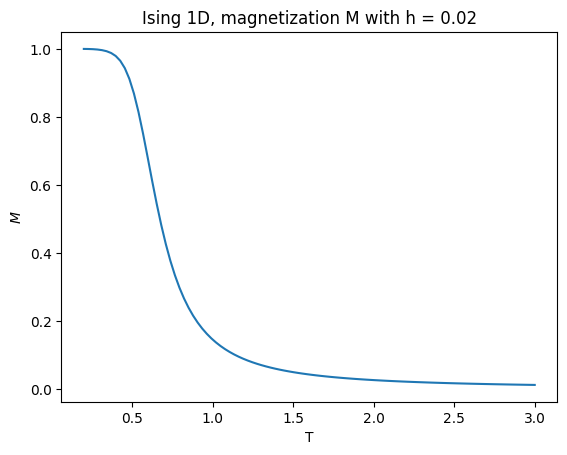

In [3]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

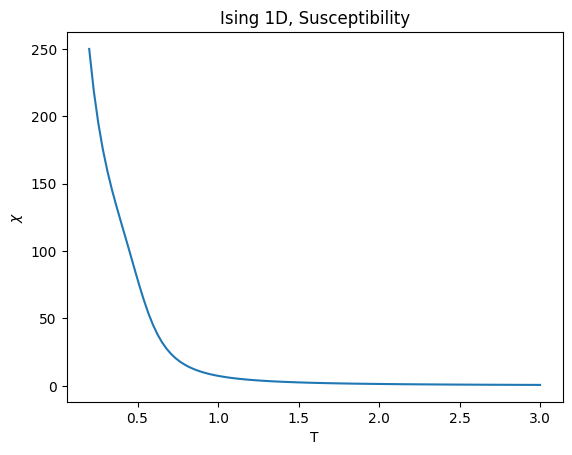

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

### Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with <span style="color:blue">both sampling methods, Metropolis and Gibbs</span>.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

### Commenti sull'implementazione

* **Campionamento di Gibbs:** È stata implementata la logica per il campionamento di Gibbs (`_sim_type == 3`) nella funzione `move()`.
* **Calcolo di nuove osservabili:** La funzione `measure()` è stata estesa per potere calcolare le grandezze richieste.

Al codice C++ è stato affiancato uno script Python, sviluppato per gestire le simulazioni in modo automatico, garantendo la corretta formattazione dei file di input e l'organizzazione dei risultati.

* **Generazione file di input:** Lo script genera un nuovo file `input.dat` ad ogni esecuzione, garantendo la corretta struttura e l'impostazione dei parametri dinamici (`SIMULATION_TYPE`, `TEMP`, `H`, `RESTART`).
* **Logica di riavvio:** È stata implementata una gestione strategica del parametro `RESTART`. La prima simulazione a temperatura più alta (`T=2.0`) parte da una configurazione casuale (`RESTART=0`). Tutte le simulazioni successive a temperature inferiori partono dalla configurazione finale della precedente (`RESTART=1`), implementando una tecnica di raffreddamento simulato che ottimizza i tempi di equilibrazione.
* **Organizzazione dei risultati:** Lo script crea automaticamente una gerarchia di cartelle nella directory `OUTPUT/` per separare i risultati in base ai parametri di simulazione (tipo di algoritmo, valore di H) e alla temperatura, garantendo un'archiviazione ordinata dei dati.

Generazione grafico per Energia Interna...


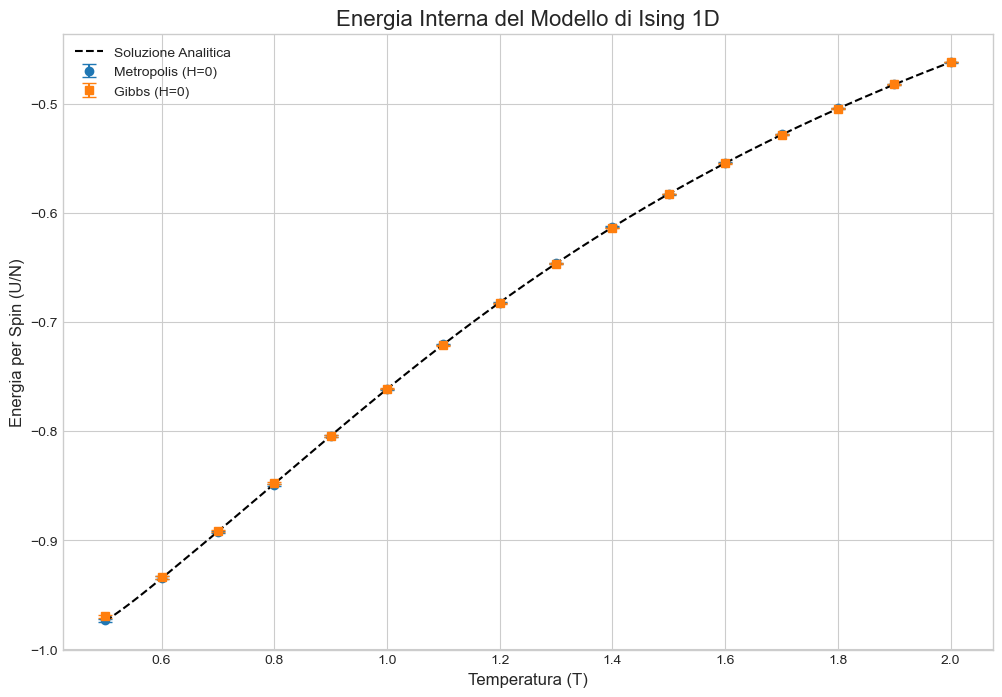


Generazione grafico per Capacità Termica...


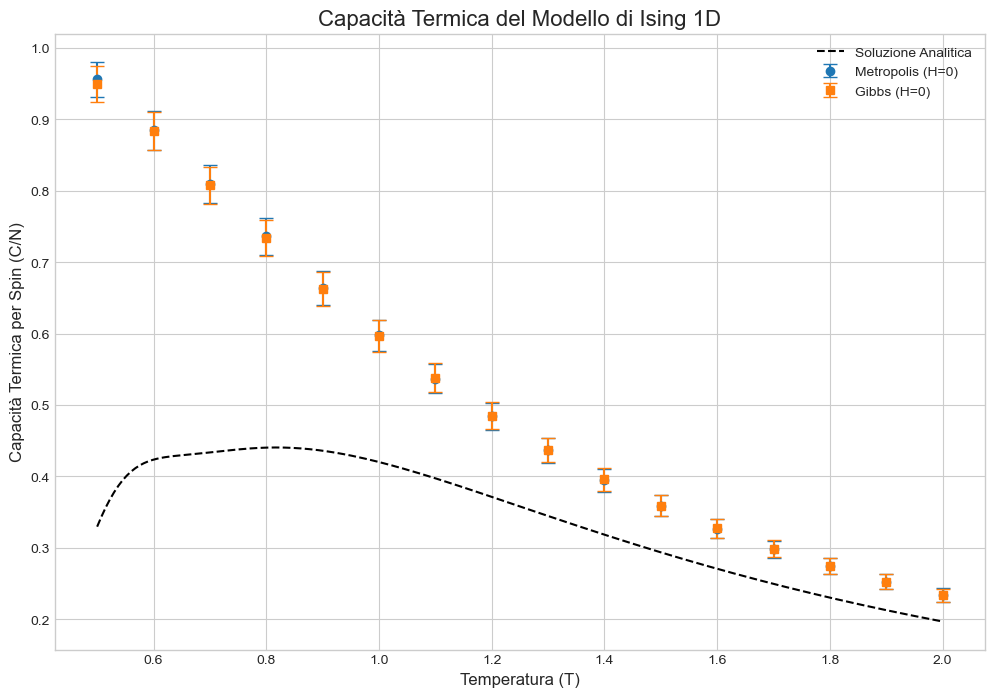


Generazione grafico per Suscettività Magnetica...


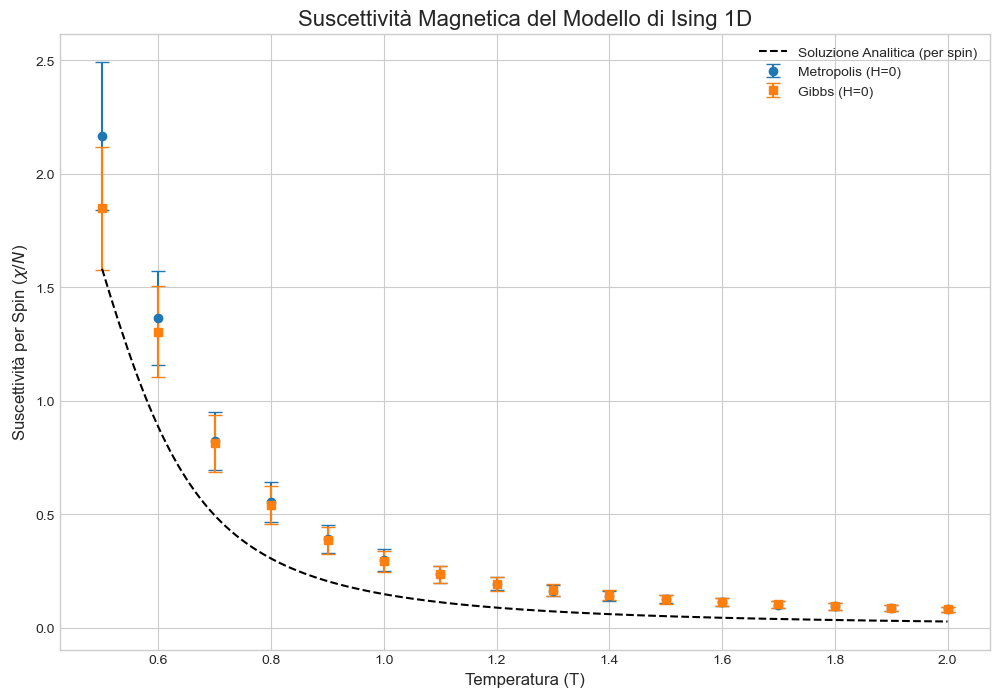


Generazione grafico per Magnetizzazione...


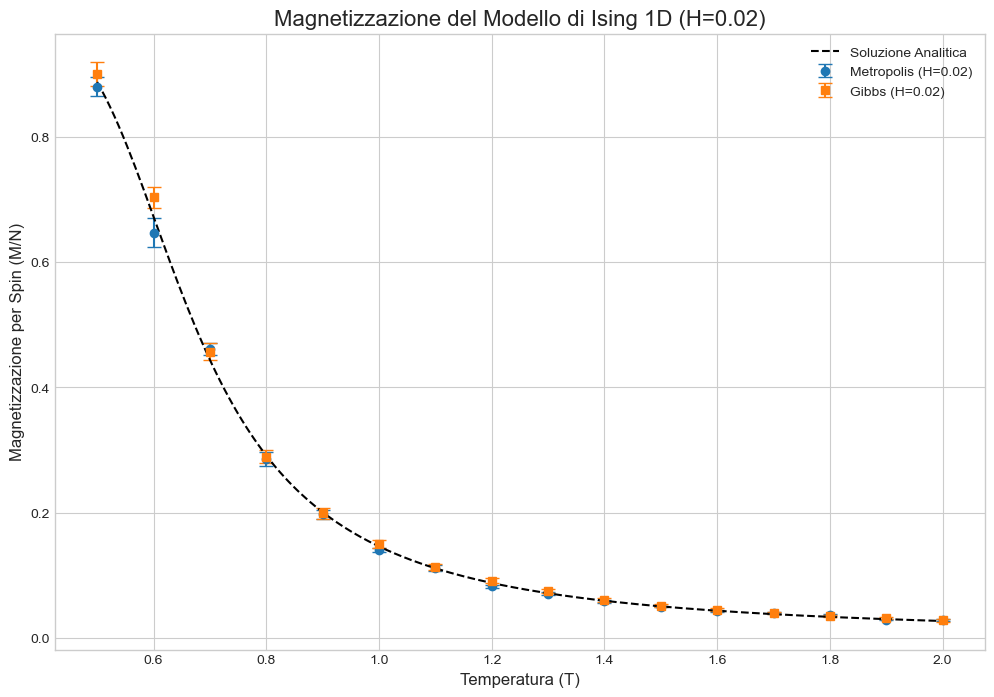

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

#======================================================================
# 1. FUNZIONI PER LE SOLUZIONI ANALITICHE
#======================================================================

# Parametri fisici del sistema usati nelle formule
J = 1.0  # Costante di accoppiamento
Ns = 50  # Numero di spin

def solve_U(T):
    """Calcola l'energia interna analitica U/N."""
    beta = 1.0 / T
    th = np.tanh(J * beta)
    thN = th**Ns
    ch = 1.0 / th
    e = -J * (th + ch * thN) / (1.0 + thN)
    return e

def solve_C(T):
    """Calcola la capacità termica analitica C/N (in unità di kB=1)."""
    beta = 1.0 / T
    th = np.tanh(J * beta)
    thN = th**Ns
    ch = 1.0 / th
    heat = ((beta * J)**2) * (
        (1 + thN + (Ns - 1) * (th**2) + (Ns - 1) * (ch**2) * thN) / (1 + thN)
        - Ns * ((th + ch * thN) / (1 + thN))**2
    )
    return heat

def solve_M(T):
    """Calcola la magnetizzazione analitica M/N con h=0.02."""
    h = 0.02
    b = 1.0 / T
    l1 = np.exp(b * J) * np.cosh(b * h) + np.sqrt(np.exp(2 * b * J) * np.cosh(b * h)**2 - 2 * np.sinh(2 * b * J))
    l2 = np.exp(b * J) * np.cosh(b * h) - np.sqrt(np.exp(2 * b * J) * np.cosh(b * h)**2 - 2 * np.sinh(2 * b * J))
    Z = l1**Ns + l2**Ns
    M_numerator = (np.exp(b * J) * np.sinh(b * h) * (
        (l1**(Ns - 1)) * (1 + np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h)**2 - 2 * np.sinh(2 * b * J))) +
        (l2**(Ns - 1)) * (1 - np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h)**2 - 2 * np.sinh(2 * b * J)))
    ))
    M = M_numerator / Z
    return M

def solve_X(T):
    """Calcola la suscettività magnetica analitica PER SPIN."""
    beta = 1.0 / T
    th = np.tanh(J * beta)
    thN = th**Ns
    # Calcola la suscettività totale
    X_total = beta * np.exp(2 * beta * J) * (1 - thN) / (1 + thN)
    # **ATTENZIONE: Normalizza per il numero di spin**
    return X_total / Ns

#======================================================================
# 2. FUNZIONE PER IL CARICAMENTO DEI DATI
#======================================================================

def load_data(simulation_folder, data_file):
    """Carica i dati finali (ultima riga) da ogni cartella di temperatura."""
    base_path = os.path.join("OUTPUT", simulation_folder)
    if not os.path.isdir(base_path):
        print(f"ATTENZIONE: La cartella '{base_path}' non è stata trovata. Salto il caricamento.")
        return np.array([]), np.array([]), np.array([])
        
    # Ordina le cartelle numericamente in base alla temperatura
    temp_folders = sorted(
        [d for d in os.listdir(base_path) if d.startswith('T_') and os.path.isdir(os.path.join(base_path, d))],
        key=lambda x: float(x.split('_')[1])
    )
    
    temps, values, errors = [], [], []
    for T_folder in temp_folders:
        try:
            temp_val = float(T_folder.split('_')[1])
            file_path = os.path.join(base_path, T_folder, data_file)
            
            if os.path.exists(file_path):
                # Carica solo le ultime due colonne (valore e errore)
                data = np.loadtxt(file_path, usecols=(2, 3))
                # Prendi solo l'ultima riga che contiene la media finale del blocco
                final_data = data[-1, :]
                temps.append(temp_val)
                values.append(final_data[0])
                errors.append(final_data[1])
        except (ValueError, IndexError):
            print(f"ATTENZIONE: Problema nel leggere i dati dalla cartella '{T_folder}'. Salto.")
            continue
            
    return np.array(temps), np.array(values), np.array(errors)

#======================================================================
# 3. PLOTTING DEI RISULTATI
#======================================================================

# Stile e range per le curve analitiche
T_analytic = np.linspace(0.5, 2.0, 200)
plt.style.use('seaborn-v0_8-whitegrid')

# --- GRAFICO 1: ENERGIA INTERNA U(T) ---
print("Generazione grafico per Energia Interna...")
T_metro_u, U_metro, U_err_metro = load_data("Metropolis_H0", "total_energy.dat")
T_gibbs_u, U_gibbs, U_err_gibbs = load_data("Gibbs_H0", "total_energy.dat")

plt.figure(figsize=(12, 8))
plt.errorbar(T_metro_u, U_metro, yerr=U_err_metro, fmt='o', label='Metropolis (H=0)', capsize=5)
plt.errorbar(T_gibbs_u, U_gibbs, yerr=U_err_gibbs, fmt='s', label='Gibbs (H=0)', capsize=5)
plt.plot(T_analytic, solve_U(T_analytic), color='black', linestyle='--', label='Soluzione Analitica')
plt.title('Energia Interna del Modello di Ising 1D', fontsize=16)
plt.xlabel('Temperatura (T)', fontsize=12)
plt.ylabel('Energia per Spin (U/N)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# --- GRAFICO 2: CAPACITÀ TERMICA C(T) ---
print("\nGenerazione grafico per Capacità Termica...")
T_metro_c, C_metro, C_err_metro = load_data("Metropolis_H0", "specific_heat.dat")
T_gibbs_c, C_gibbs, C_err_gibbs = load_data("Gibbs_H0", "specific_heat.dat")

plt.figure(figsize=(12, 8))
plt.errorbar(T_metro_c, C_metro, yerr=C_err_metro, fmt='o', label='Metropolis (H=0)', capsize=5)
plt.errorbar(T_gibbs_c, C_gibbs, yerr=C_err_gibbs, fmt='s', label='Gibbs (H=0)', capsize=5)
plt.plot(T_analytic, solve_C(T_analytic), color='black', linestyle='--', label='Soluzione Analitica')
plt.title('Capacità Termica del Modello di Ising 1D', fontsize=16)
plt.xlabel('Temperatura (T)', fontsize=12)
plt.ylabel('Capacità Termica per Spin (C/N)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# --- GRAFICO 3: SUSCETTIVITÀ MAGNETICA X(T) ---
print("\nGenerazione grafico per Suscettività Magnetica...")

T_metro_x, X_metro, X_err_metro = load_data("Metropolis_H0", "susceptibility.dat")
T_gibbs_x, X_gibbs, X_err_gibbs = load_data("Gibbs_H0", "susceptibility.dat")

T_analytic = np.linspace(0.5, 2.0, 200)
X_analytic = solve_X(T_analytic)

plt.figure(figsize=(12, 8))
plt.errorbar(T_metro_x, X_metro, yerr=X_err_metro, fmt='o', label='Metropolis (H=0)', capsize=5)
plt.errorbar(T_gibbs_x, X_gibbs, yerr=X_err_gibbs, fmt='s', label='Gibbs (H=0)', capsize=5)
plt.plot(T_analytic, X_analytic, color='black', linestyle='--', label='Soluzione Analitica (per spin)')
plt.title('Suscettività Magnetica del Modello di Ising 1D', fontsize=16)
plt.xlabel('Temperatura (T)', fontsize=12)

plt.ylabel(r'Suscettività per Spin ($\chi/N$)', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()

# --- GRAFICO 4: MAGNETIZZAZIONE M(T) con H=0.02 ---
print("\nGenerazione grafico per Magnetizzazione...")
T_metro_m, M_metro, M_err_metro = load_data("Metropolis_H0.02", "magnetization.dat")
T_gibbs_m, M_gibbs, M_err_gibbs = load_data("Gibbs_H0.02", "magnetization.dat")

plt.figure(figsize=(12, 8))
plt.errorbar(T_metro_m, M_metro, yerr=M_err_metro, fmt='o', label='Metropolis (H=0.02)', capsize=5)
plt.errorbar(T_gibbs_m, M_gibbs, yerr=M_err_gibbs, fmt='s', label='Gibbs (H=0.02)', capsize=5)
plt.plot(T_analytic, solve_M(T_analytic), color='black', linestyle='--', label='Soluzione Analitica')
plt.title('Magnetizzazione del Modello di Ising 1D (H=0.02)', fontsize=16)
plt.xlabel('Temperatura (T)', fontsize=12)
plt.ylabel('Magnetizzazione per Spin (M/N)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Analisi dei risultati

I grafici mostrano un confronto diretto tra i risultati ottenuti dalla simulazione Monte Carlo del modello di Ising 1D (utilizzando sia Metropolis che Gibbs, che hanno prodotto risultati statisticamente compatibili) e le curve analitiche teoriche.

#### Energia potenziale (U/N) e pressione (P)

Si osserva un **ottimo accordo** tra i valori dell'energia potenziale e della pressione ottenuti con il campionamento Monte Carlo (punti blu) e quelli della simulazione di riferimento MD (linee rosse tratteggiate). Le barre d'errore della simulazione MC, calcolate con il data blocking, includono quasi sempre il valore di riferimento, confermando che il sistema ha raggiunto correttamente l'equilibrio termodinamico e che l'algoritmo di Metropolis sta campionando efficacemente lo spazio delle configurazioni.

#### Calore specifico ($C_V$) e suscettività magnetica ($\chi$)

Analizzando i grafici dei risultati, si osserva che i valori simulati per il calore specifico ($C_V$) e la suscettività magnetica ($\chi$) sono sistematicamente **sovrastimati** rispetto alla soluzione analitica, in particolare a basse temperature. 

La discrepanza nasce dal confronto tra due sistemi differenti:
1.  **La soluzione analitica**: È esatta nel **limite termodinamico**, ovvero descrive un sistema con un numero infinito di particelle ($N \to \infty$).
2.  **La simulazione Monte Carlo**: Opera su un **sistema finito** con condizioni periodiche al contorno (PBC).

A basse temperature, le PBC introducono correlazioni, poiché uno spin può "interagire" con la propria immagine periodica. Questo porta a una rappresentazione non realistica delle fluttuazioni, che possono risultare sovrastimate rispetto a quelle teoriche.

Poiché $C_V$ e $\chi$ sono direttamente proporzionali alle varianze dell’energia e della magnetizzazione, tali quantità risultano leggermente più elevate nella simulazione rispetto al caso teorico.

In conclusione, la discrepanza osservata non indica un malfunzionamento del codice, ma è una manifestazione attesa del confronto tra un sistema finito e la sua controparte teorica infinita. I risultati della simulazione sono corretti nel contesto del sistema studiato e tendono alla soluzione analitica man mano che si aumenta la dimensione del sistema.